In [73]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os.path as osp
csv_dir = '/home/ayush/DyGLib/csvs'

#### Comparision of old models for new node and new node first interaction metric

In [39]:
old_test_ap = pd.read_csv(osp.join(csv_dir, 'old_test_ap.csv'))
old_new_node_test_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_ap.csv'))
old_new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_first_1_ap.csv'))
old_new_node_test_first_3_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_first_3_ap.csv'))
data_names = old_new_node_test_ap['Name']
data_names = ["-".join(name.split("-")[1:-1]) for name in data_names]
old_test_ap = old_test_ap['test average_precision']
old_new_node_test_ap = old_new_node_test_ap['new node test average_precision']
old_new_node_test_first_1_ap = old_new_node_test_first_1_ap['new node test first_1_average_precision']
old_new_node_test_first_3_ap = old_new_node_test_first_3_ap['new node test first_3_average_precision']

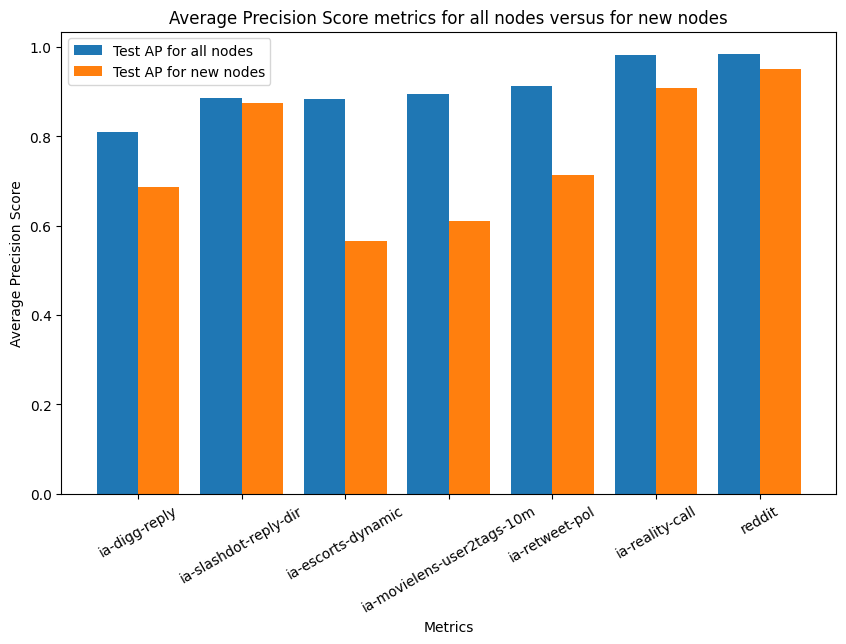

In [69]:
X = data_names
Y_test_ap = old_test_ap
Z_test_first_1_ap = old_new_node_test_first_1_ap
  
X_axis = np.arange(len(X)) 
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, Y_test_ap, 0.4, label = 'Test AP for all nodes') 
plt.bar(X_axis + 0.2, Z_test_first_1_ap, 0.4, label = 'Test AP for new nodes') 

plt.xticks(X_axis, X, rotation = 30) 
plt.xlabel("Metrics") 
plt.ylabel("Average Precision Score") 
plt.title("Average Precision Score metrics for all nodes versus for new nodes") 
plt.legend()
plt.show() 


In [58]:
names = [name for name in data_names]
vals= {}
for name in names:
  df = pd.read_csv(osp.join(csv_dir, f"{name}_corr.csv"))
  vals[name] = df['correlation']

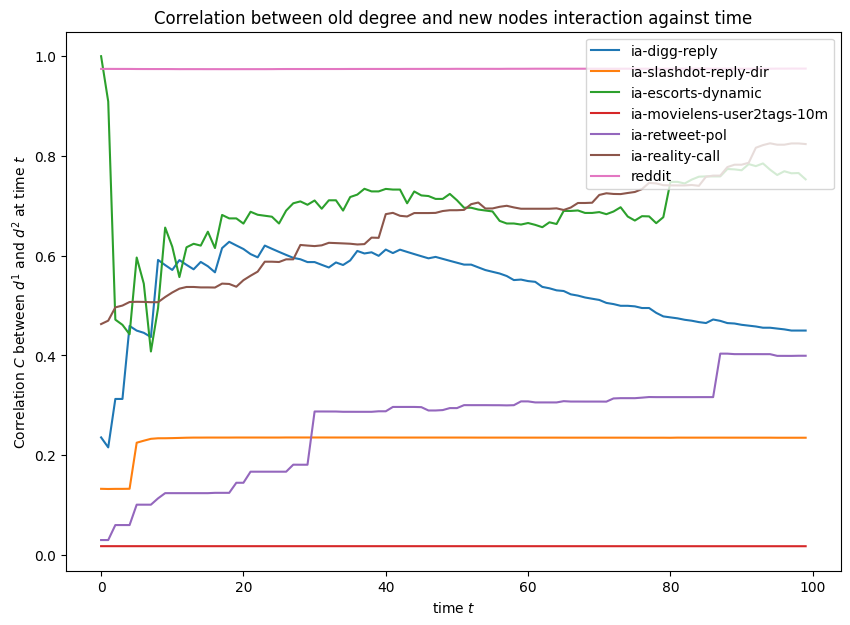

In [68]:
plt.figure(figsize=(10, 7))
for name, data in vals.items():
  new = data.to_numpy()[~np.isnan(data.to_numpy())]
  step = len(new) // 100
  inds = np.arange(0, 100)
  plt.plot(inds, new[inds])
plt.title("Correlation between old degree and new nodes interaction against time")
plt.xlabel(r'time $t$')
plt.ylabel(r'Correlation $C$ between $d^1$ and $d^2$ at time $t$')
plt.legend(names, loc = 1)
plt.show()

#### Plots for each tried method

Degree weighted

In [80]:
csv_dir_degree = '/home/ayush/DyGLib/csvs/degree'
test_ap = pd.read_csv(osp.join(csv_dir_degree, 'test_ap.csv'))
new_node_test_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_ap.csv'))
new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_first_1_ap.csv'))

In [114]:
csv_dir_degree = '/home/ayush/DyGLib/csvs/degree'
test_ap = pd.read_csv(osp.join(csv_dir_degree, 'test_ap.csv'))
new_node_test_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_ap.csv'))
new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_first_1_ap.csv'))
data_names = list(test_ap['Name'])
data_names = ["-".join(name.split("-")[1:-3]) for name in data_names]

old_test_ap = pd.read_csv(osp.join(csv_dir, 'old_test_ap.csv'))
old_new_node_test_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_ap.csv'))
old_new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_first_1_ap.csv'))

dfs = [old_test_ap, old_new_node_test_ap, old_new_node_test_first_1_ap]
for i in range(3):
  df = dfs[i]
  for j in range(len(df)):
    df.loc[j, ('Name')] = "-".join(df.loc[j, ('Name')].split("-")[1:-1])
  filtered_df = df.loc[df['Name'].isin(data_names)]
  filtered_df = filtered_df.set_index('Name').loc[data_names].reset_index()
  dfs[i] = filtered_df

test_ap = test_ap['test average_precision'].to_numpy()
new_node_test_ap = new_node_test_ap['new node test average_precision'].to_numpy()
new_node_test_first_1_ap = new_node_test_first_1_ap['new node test first_1_average_precision'].to_numpy()

old_test_ap = dfs[0]['test average_precision'].to_numpy()
old_new_node_test_ap = dfs[1]['new node test average_precision'].to_numpy()
old_new_node_test_first_1_ap = dfs[2]['new node test first_1_average_precision'].to_numpy()

In [115]:
print("Increase in average AP")
print(np.mean(test_ap - old_test_ap))
print("Increase in new node average AP")
print(np.mean(new_node_test_ap - old_new_node_test_ap))
print("Increase in new node first 1 average AP")
print(np.mean(new_node_test_first_1_ap - old_new_node_test_first_1_ap))

Increase in average AP
0.005584937317512195
Increase in new node average AP
0.004002604833376426
Increase in new node first 1 average AP
0.02602951010708715


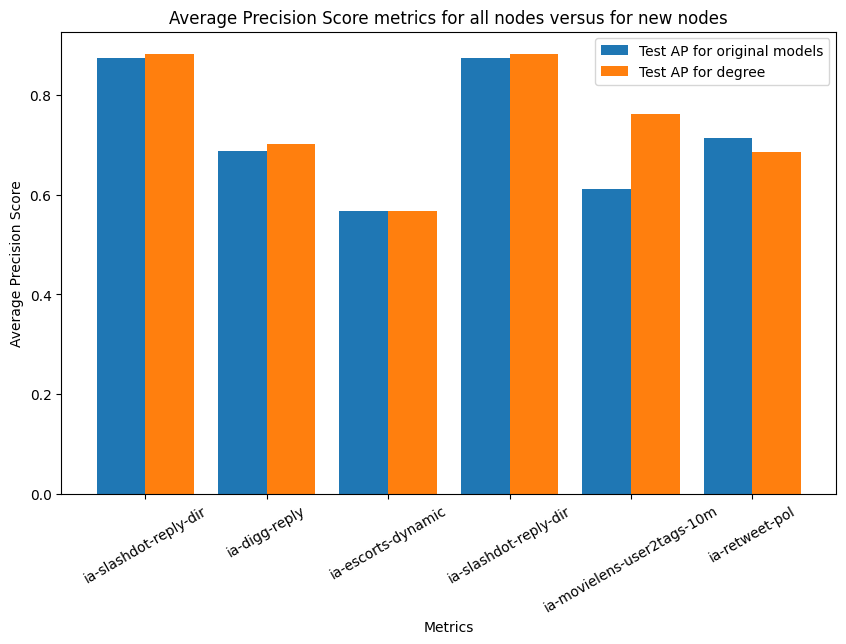

In [116]:
X = data_names
Y_test_ap = old_new_node_test_first_1_ap
Z_test_ap = new_node_test_first_1_ap

X_axis = np.arange(len(X)) 
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.1, Y_test_ap, 0.2, label = 'AP for original model') 
plt.bar(X_axis + 0.1, Z_test_ap, 0.2, label = 'AP for degree weighted average model')
plt.bar(X_axis + 0.3, Z_test_ap, 0.2, label = 'AP for log degree weighted average model')

plt.xticks(X_axis, X, rotation = 30) 
plt.xlabel("Metrics") 
plt.ylabel("Average Precision Score") 
plt.title("Average Precision Score metrics for all nodes versus for new nodes") 
plt.legend()
plt.show() 

log-degree

In [106]:
csv_dir_degree = '/home/ayush/DyGLib/csvs/log-degree'
test_ap = pd.read_csv(osp.join(csv_dir_degree, 'test_ap.csv'))
new_node_test_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_ap.csv'))
new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_first_1_ap.csv'))
data_names = list(test_ap['Name'])
data_names = ["-".join(name.split("-")[1:-4]) for name in data_names]

old_test_ap = pd.read_csv(osp.join(csv_dir, 'old_test_ap.csv'))
old_new_node_test_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_ap.csv'))
old_new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_first_1_ap.csv'))

dfs = [old_test_ap, old_new_node_test_ap, old_new_node_test_first_1_ap]
for i in range(3):
  df = dfs[i]
  for j in range(len(df)):
    df.loc[j, ('Name')] = "-".join(df.loc[j, ('Name')].split("-")[1:-1])
  filtered_df = df.loc[df['Name'].isin(data_names)]
  filtered_df = filtered_df.set_index('Name').loc[data_names].reset_index()
  dfs[i] = filtered_df

test_ap = test_ap['test average_precision'].to_numpy()
new_node_test_ap = new_node_test_ap['new node test average_precision'].to_numpy()
new_node_test_first_1_ap = new_node_test_first_1_ap['new node test first_1_average_precision'].to_numpy()

old_test_ap = dfs[0]['test average_precision'].to_numpy()
old_new_node_test_ap = dfs[1]['new node test average_precision'].to_numpy()
old_new_node_test_first_1_ap = dfs[2]['new node test first_1_average_precision'].to_numpy()

In [107]:
print("Increase in average AP")
print(np.mean(test_ap - old_test_ap))
print("Increase in new node average AP")
print(np.mean(new_node_test_ap - old_new_node_test_ap))
print("Increase in new node first 1 average AP")
print(np.mean(new_node_test_first_1_ap - old_new_node_test_first_1_ap))

Increase in average AP
0.007532999925557604
Increase in new node average AP
0.007003566395505101
Increase in new node first 1 average AP
0.007358062687963507


time-exp

In [108]:
csv_dir_degree = '/home/ayush/DyGLib/csvs/time-exp'
test_ap = pd.read_csv(osp.join(csv_dir_degree, 'test_ap.csv'))
new_node_test_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_ap.csv'))
new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_first_1_ap.csv'))
data_names = list(test_ap['Name'])
data_names = ["-".join(name.split("-")[1:-5]) for name in data_names]

old_test_ap = pd.read_csv(osp.join(csv_dir, 'old_test_ap.csv'))
old_new_node_test_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_ap.csv'))
old_new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_first_1_ap.csv'))

dfs = [old_test_ap, old_new_node_test_ap, old_new_node_test_first_1_ap]
for i in range(3):
  df = dfs[i]
  for j in range(len(df)):
    df.loc[j, ('Name')] = "-".join(df.loc[j, ('Name')].split("-")[1:-1])
  filtered_df = df.loc[df['Name'].isin(data_names)]
  filtered_df = filtered_df.set_index('Name').loc[data_names].reset_index()
  dfs[i] = filtered_df

test_ap = test_ap['test average_precision'].to_numpy()
new_node_test_ap = new_node_test_ap['new node test average_precision'].to_numpy()
new_node_test_first_1_ap = new_node_test_first_1_ap['new node test first_1_average_precision'].to_numpy()

old_test_ap = dfs[0]['test average_precision'].to_numpy()
old_new_node_test_ap = dfs[1]['new node test average_precision'].to_numpy()
old_new_node_test_first_1_ap = dfs[2]['new node test first_1_average_precision'].to_numpy()

In [109]:
print("Increase in average AP")
print(np.mean(test_ap - old_test_ap))
print("Increase in new node average AP")
print(np.mean(new_node_test_ap - old_new_node_test_ap))
print("Increase in new node first 1 average AP")
print(np.mean(new_node_test_first_1_ap - old_new_node_test_first_1_ap))

Increase in average AP
-0.007153930073779545
Increase in new node average AP
-0.05520119405821438
Increase in new node first 1 average AP
-0.03237196377627


time-linear

In [110]:
csv_dir_degree = '/home/ayush/DyGLib/csvs/time-linear'
test_ap = pd.read_csv(osp.join(csv_dir_degree, 'test_ap.csv'))
new_node_test_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_ap.csv'))
new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir_degree, 'new_node_test_first_1_ap.csv'))
data_names = list(test_ap['Name'])
data_names = ["-".join(name.split("-")[1:-5]) for name in data_names]

old_test_ap = pd.read_csv(osp.join(csv_dir, 'old_test_ap.csv'))
old_new_node_test_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_ap.csv'))
old_new_node_test_first_1_ap = pd.read_csv(osp.join(csv_dir, 'old_new_node_test_first_1_ap.csv'))

dfs = [old_test_ap, old_new_node_test_ap, old_new_node_test_first_1_ap]
for i in range(3):
  df = dfs[i]
  for j in range(len(df)):
    df.loc[j, ('Name')] = "-".join(df.loc[j, ('Name')].split("-")[1:-1])
  filtered_df = df.loc[df['Name'].isin(data_names)]
  filtered_df = filtered_df.set_index('Name').loc[data_names].reset_index()
  dfs[i] = filtered_df

test_ap = test_ap['test average_precision'].to_numpy()
new_node_test_ap = new_node_test_ap['new node test average_precision'].to_numpy()
new_node_test_first_1_ap = new_node_test_first_1_ap['new node test first_1_average_precision'].to_numpy()

old_test_ap = dfs[0]['test average_precision'].to_numpy()
old_new_node_test_ap = dfs[1]['new node test average_precision'].to_numpy()
old_new_node_test_first_1_ap = dfs[2]['new node test first_1_average_precision'].to_numpy()

In [111]:
print("Increase in average AP")
print(np.mean(test_ap - old_test_ap))
print("Increase in new node average AP")
print(np.mean(new_node_test_ap - old_new_node_test_ap))
print("Increase in new node first 1 average AP")
print(np.mean(new_node_test_first_1_ap - old_new_node_test_first_1_ap))

Increase in average AP
-0.0030262132140999785
Increase in new node average AP
0.0032699804284557397
Increase in new node first 1 average AP
-0.01391620510785326
